In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

from my_utils import *

from laplace2D import *

import copy

In [2]:
def relax_2D_dielectric(potential,fixed_mask,epsilon):
    old_matrix = potential.matrix
    eps_matrix = np.sqrt(epsilon.matrix)

    # fixed potential areas
    fmask = fixed_mask.matrix
    # open areas - free space where the field spreads
    omask = 1 - fmask

    neigh_R = old_matrix.copy()
    neigh_R[:,0:-2] = old_matrix[:,1:-1]
    neigh_L = old_matrix.copy()
    neigh_L[:,1:-1] = old_matrix[:,0:-2]
    neigh_U = old_matrix.copy()
    neigh_U[0:-2,:] = old_matrix[1:-1,:]
    neigh_D = old_matrix.copy()
    neigh_D[1:-1,:] = old_matrix[0:-2,:]
    
    eps_R = eps_matrix.copy()
    eps_L = eps_matrix.copy()
    eps_U = eps_matrix.copy()
    eps_D = eps_matrix.copy()
    eps_D[1:-1,:] = eps_matrix[0:-2,:]
    eps_U[0:-2,:] = eps_matrix[1:-1,:]
    eps_R[:,0:-2] = eps_matrix[:,1:-1]
    eps_L[:,1:-1] = eps_matrix[:,0:-2]
    

    potential.matrix[:,:] =  1./(eps_R + eps_L + eps_U + eps_D) \
       *(  eps_L * neigh_L \
         + eps_R * neigh_R \
         + eps_U * neigh_U \
         + eps_D * neigh_D )*omask\
       + old_matrix*fmask

In [3]:
def gen_dielectric_field(grid,dielectric_list):
    epsilon = field(grid)
    epsilon.matrix += eps_0
    
    for dielectric in dielectric_list:
        i_min, j_min = grid.pos_to_index(dielectric.x_min,dielectric.y_min)
        i_max, j_max = grid.pos_to_index(dielectric.x_max,dielectric.y_max)
        size_i = i_max - i_min 
        size_j = j_max - j_min 
        epsilon.matrix[i_min:i_max,j_min:j_max] = np.ones([size_i,size_j])*dielectric.eps_r*eps_0
        
    return epsilon

In [4]:
my_grid = grid(-1.5,1.5,.05,-1,1,.05)

c1 = conductor(-1,-0.7,-0.5,0.5,V=1)
c2 = conductor(0.7,1,-0.5,0.5,V=-1.)
d1 = dielectric(-0.3,0.3,-0.3,0.3,eps_r=3)
conductor_list = [c1,c2]
dielectric_list = [d1]

In [5]:
V = field(grid=my_grid)

In [6]:
fixed_mask, start_potential = conductors_to_mask(my_grid,conductor_list)

In [7]:
potential = copy.deepcopy(start_potential)

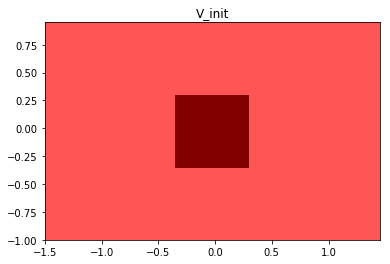

In [8]:
epsilon = gen_dielectric_field(my_grid,dielectric_list)


scale= np.max(epsilon.matrix)

plt.pcolormesh(my_grid.X,my_grid.Y,epsilon.matrix,cmap="seismic")
plt.clim(-scale,scale)
plt.title("V_init")
plt.show()

In [9]:
for i in range(10000):
    relax_2D_dielectric(potential,fixed_mask,epsilon)

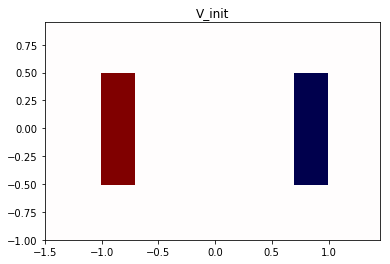

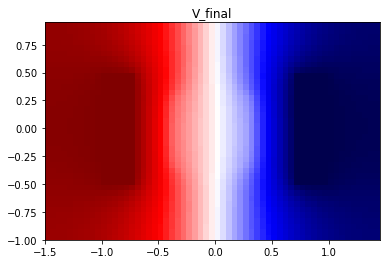

In [10]:
#small_figure()

scale= 1

plt.pcolormesh(my_grid.X,my_grid.Y,start_potential.matrix,cmap="seismic")
plt.clim(-scale,scale)
plt.title("V_init")
plt.show()

plt.pcolormesh(my_grid.X,my_grid.Y,potential.matrix,cmap="seismic")
plt.clim(-scale,scale)
plt.title("V_final")
plt.show()

In [11]:
E = E_from_V(potential)

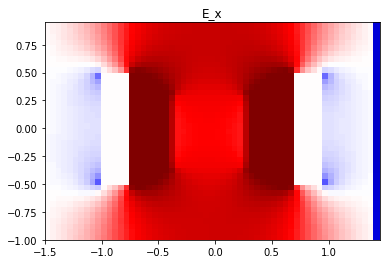

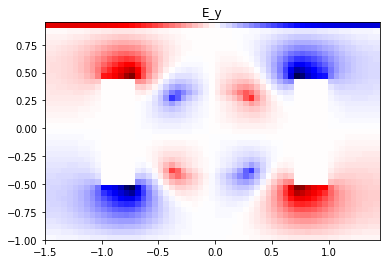

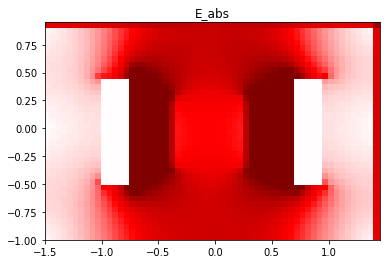

In [12]:
scale = .1e12
scale = 1.5/eps_0


plt.pcolormesh(my_grid.X,my_grid.Y,E.matrix[:,:,0],cmap="seismic")
plt.clim(-scale,scale)
plt.title("E_x")
plt.show()

plt.pcolormesh(my_grid.X,my_grid.Y,E.matrix[:,:,1],cmap="seismic")
plt.clim(-scale,scale)
plt.title("E_y")
plt.show()

e_abs = np.sqrt(E.matrix[:,:,0]**2 + E.matrix[:,:,1]**2)
plt.pcolormesh(my_grid.X,my_grid.Y,e_abs, cmap='seismic')
plt.clim(-scale,scale)
plt.title("E_abs")
plt.show()

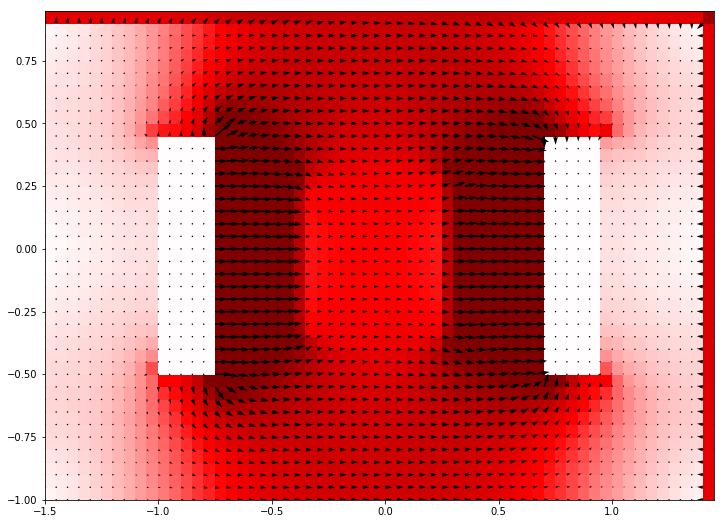

In [13]:
big_figure()

e_abs = np.sqrt(E.matrix[:,:,0]**2 + E.matrix[:,:,1]**2)
plt.pcolormesh(my_grid.X,my_grid.Y,e_abs,cmap="seismic")
plt.clim(-scale,scale)
plt.quiver(my_grid.X,my_grid.Y,E.matrix[:,:,0],E.matrix[:,:,1], scale=100/eps_0)

#plt.xlim(-0.6,0.6)
#plt.ylim(-0.1,0.5)
plt.show()

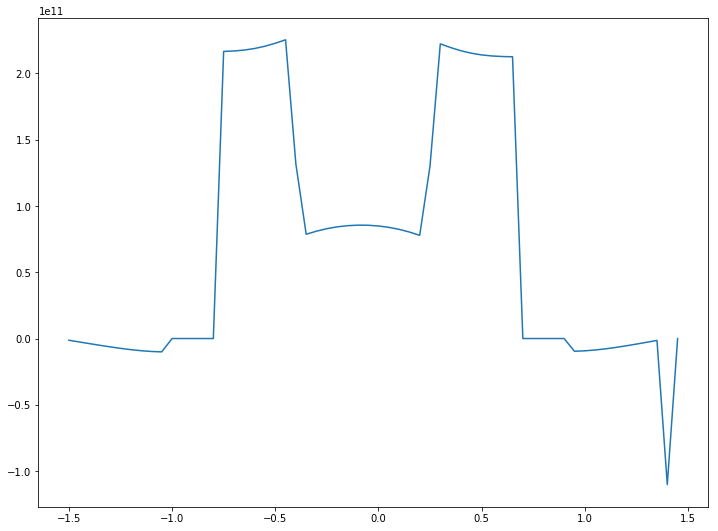

In [14]:
middle , dummy = my_grid.pos_to_index(0,0)

plt.plot(my_grid.x_edges,E.matrix[middle,:,0])

In [15]:
rho = rho_from_V(potential)

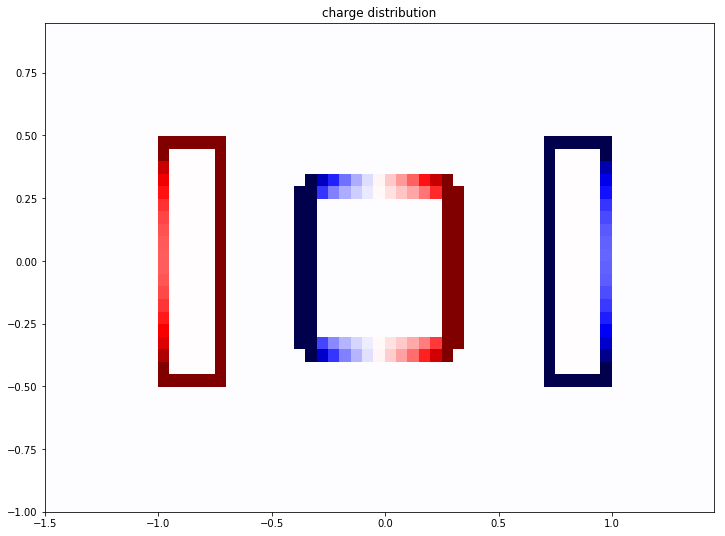

In [16]:
scale = 5e-11

plt.pcolormesh(my_grid.X,my_grid.Y,rho.matrix,cmap="seismic")
plt.clim(-scale,scale)
plt.title("charge distribution")
plt.show()